<a href="https://colab.research.google.com/github/barbaraperez/Estudo-do-diabetes/blob/main/machine_learning_b3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bloco 3**



#### **Passos iniciais**

In [ ]:
# importando bibliotecas principais
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
url = "https://github.com/barbaraperez/Estudo-do-diabetes/blob/main/datateste_diabetes1.5.xlsx?raw=true" # salva o link da nossa tabela de dados armazenados em arquivo xlsx no github em uma variável
df = pd.read_excel(url, header=0) #pede para o pandas criar um dataframe com esses dados

In [ ]:
print(df.shape) ## número de linhas e colunas dos nossos dados

(66, 7)


In [ ]:
print(df.dtypes) ## tipo dos dados de cada coluna

ano                        int64
pais                      object
idh                      float64
populacao_geral            int64
per_crian_cinc_soprep    float64
kcal_medio                 int64
diabeticos               float64
dtype: object


In [ ]:
print(df.describe()) ## estatísticas descritivas dos dados

               ano        idh  populacao_geral  per_crian_cinc_soprep  \
count    66.000000  60.000000     6.600000e+01              63.000000   
mean   2010.500000   0.784750     8.477532e+07               9.909524   
std       6.392905   0.050022     8.009502e+07               2.392037   
min    2000.000000   0.685000     1.534235e+07               6.200000   
25%    2005.000000   0.756000     1.827441e+07               7.100000   
50%    2010.500000   0.787500     4.102497e+07              10.600000   
75%    2016.000000   0.830250     1.855970e+08              12.050000   
max    2021.000000   0.851000     2.139934e+08              12.900000   

        kcal_medio    diabeticos  
count    66.000000     66.000000  
mean   2415.045455   4531.775606  
std      21.913418   5240.595637  
min    2367.000000    131.100000  
25%    2398.750000   1176.600000  
50%    2414.000000   1638.750000  
75%    2433.000000   7955.975000  
max    2448.000000  15733.600000  


In [ ]:
df.head ## 5 primeiras linhas e 5 últimas linhas

<bound method NDFrame.head of      ano    pais    idh  populacao_geral  per_crian_cinc_soprep  kcal_medio  \
0   2021  Brasil    NaN        213993441                    NaN        2447   
1   2020  Brasil    NaN        212559409                    7.3        2448   
2   2019  Brasil  0.765        211049519                    7.2        2447   
3   2018  Brasil  0.762        209469320                    7.2        2447   
4   2017  Brasil  0.761        207833825                    7.1        2446   
..   ...     ...    ...              ...                    ...         ...   
61  2004   Chile  0.785         16014972                   11.4        2403   
62  2003   Chile  0.776         15849649                   11.5        2397   
63  2002   Chile  0.769         15684413                   11.5        2391   
64  2001   Chile  0.767         15516112                   11.4        2386   
65  2000   Chile  0.756         15342350                   11.3        2378   

    diabeticos  
0   

In [ ]:
print(df.index) 
print()
print(df.columns)

RangeIndex(start=0, stop=66, step=1)

Index(['ano', 'pais', 'idh', 'populacao_geral', 'per_crian_cinc_soprep',
       'kcal_medio', 'diabeticos'],
      dtype='object')


Como vemos acima, as linhas são identificadas por números inteiros de 0 até 66 e as colunas são identificadas por strings, sendo elas:

-   `ano`: ano relativo aqueles dados;
-   `pais`: país de origem daqueles dados;
-   `idh`: Índice de Desenvolvimento Humano daquele país naquele determinado ano;
-   `populacao_geral`: número absoluto de pessoas
-   `per_crian_cinc_soprep`: porcentagem de crianças com 5 anos ou menos que estão com sobrepeso em determinado país em determinado ano
-   `kcal_medio`: necessidade calóriga média em kcal ingerida por dia por pessoas de determinado país em determinado ano
-   `´diabeticos`: número de indivíduos diabéticos em milhar de determinado país a cada ano.

In [ ]:
print(df.loc[20])

ano                           2001
pais                        Brasil
idh                          0.691
populacao_geral          177196051
per_crian_cinc_soprep          6.2
kcal_medio                    2371
diabeticos                  4378.7
Name: 20, dtype: object


In [ ]:
#Removendo as linhas correspondentes aos anos de 2021 e 2020
df_atualizado = df.drop([0, 1, 22, 23, 44, 45], axis=0)
print(df_atualizado)

     ano       pais    idh  populacao_geral  per_crian_cinc_soprep  \
2   2019     Brasil  0.765        211049519                    7.2   
3   2018     Brasil  0.762        209469320                    7.2   
4   2017     Brasil  0.761        207833825                    7.1   
5   2016     Brasil  0.758        206163056                    7.1   
6   2015     Brasil  0.756        204471759                    7.1   
7   2014     Brasil  0.756        202763744                    7.0   
8   2013     Brasil  0.753        201035904                    6.9   
9   2012     Brasil  0.735        199287292                    6.9   
10  2011     Brasil  0.731        197514541                    6.8   
11  2010     Brasil  0.727        195713637                    6.8   
12  2009     Brasil  0.719        193886505                    6.7   
13  2008     Brasil  0.717        192030362                    6.6   
14  2007     Brasil  0.706        190130445                    6.6   
15  2006     Brasil 

Essas linhas referentes a 2020 e 2021 serão removidas porque, durante esses anos, enfrentou-se uma pandemia mundial de COVID-19, assim, os números e condições se diferem muito da realidade analisada em outros anos, logo, é preciso eliminá-las para que o modelo não seja mau influenciado.

In [ ]:
df_atualizado["diabetes_normalizado"] = df_atualizado["diabeticos"].div(df_atualizado["populacao_geral"].values)
print(df_atualizado)

     ano       pais    idh  populacao_geral  per_crian_cinc_soprep  \
2   2019     Brasil  0.765        211049519                    7.2   
3   2018     Brasil  0.762        209469320                    7.2   
4   2017     Brasil  0.761        207833825                    7.1   
5   2016     Brasil  0.758        206163056                    7.1   
6   2015     Brasil  0.756        204471759                    7.1   
7   2014     Brasil  0.756        202763744                    7.0   
8   2013     Brasil  0.753        201035904                    6.9   
9   2012     Brasil  0.735        199287292                    6.9   
10  2011     Brasil  0.731        197514541                    6.8   
11  2010     Brasil  0.727        195713637                    6.8   
12  2009     Brasil  0.719        193886505                    6.7   
13  2008     Brasil  0.717        192030362                    6.6   
14  2007     Brasil  0.706        190130445                    6.6   
15  2006     Brasil 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_atualizado[['pais']])

print(transformed.toarray())
print(ohe.categories_)
df_atualizado[ohe.categories_[0]] = transformed.toarray()
print(df_atualizado.head())

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[array(['Argentina', 'Brasil', 'Chile'], dtype=object)]
    ano    pais    idh  populacao_geral  per_crian_cinc_soprep  kcal_medio  \
2  2019  Brasil  0.765        211049519                    7.2        2447   
3  2018  Brasil  0.762        209469320                    7.2     

In [ ]:
from sklearn.model_selection import train_test_split

Tam_Teste = 0.15
Semente_Aleatoria = 623119
dataset_name = "df_atualizado"
features = ['ano', 'idh', 'populacao_geral', 'per_crian_cinc_soprep',
       'kcal_medio', 'Argentina', 'Brasil','Chile']
target = ['diabetes_normalizado']


indices = df_atualizado.index
indices_treino, indices_teste = train_test_split(indices, test_size = Tam_Teste, random_state=Semente_Aleatoria)

df_treino = df_atualizado.loc[indices_treino]
df_teste = df_atualizado.loc[indices_teste]

X_treino = df_treino.reindex(features, axis=1).values
y_treino = df_treino.reindex(target, axis=1).values
X_teste = df_teste.reindex(features, axis=1).values
y_teste = df_teste.reindex(target, axis=1).values

print("Treino:")
print(df_treino)
print()
print("Teste:")
print(df_teste)


Treino:
     ano       pais    idh  populacao_geral  per_crian_cinc_soprep  \
39  2004  Argentina  0.787         38491970                   12.0   
17  2004     Brasil  0.698        184006479                    6.4   
33  2010  Argentina  0.829         40788453                   12.3   
13  2008     Brasil  0.717        192030362                    6.6   
36  2007  Argentina  0.817         39684303                   12.2   
8   2013     Brasil  0.753        201035904                    6.9   
63  2002      Chile  0.769         15684413                   11.5   
2   2019     Brasil  0.765        211049519                    7.2   
6   2015     Brasil  0.756        204471759                    7.1   
24  2019  Argentina  0.845         44938712                   12.9   
40  2003  Argentina  0.786         38087866                   11.9   
31  2012  Argentina  0.834         41733271                   12.4   
37  2006  Argentina  0.812         39289876                   12.2   
35  2008  Ar

In [ ]:
#normalizando os dados
from sklearn.preprocessing import StandardScaler
X = df_atualizado.reindex(features, axis=1)
sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

In [ ]:
#cálculo da PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

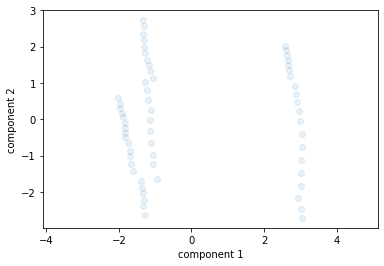

In [ ]:
#gráficos da PCA, junto dos dois primeiros eixos das features
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal');

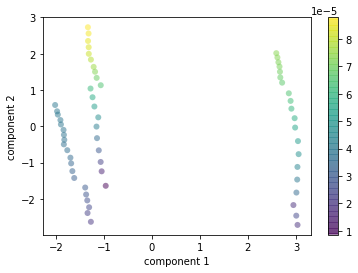

In [ ]:
#colorindo o gráfico
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5, c=df_atualizado["diabetes_normalizado"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

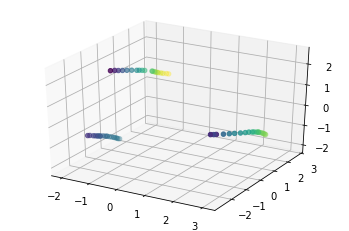

In [ ]:
#gráfico com as três componentes principais
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df_atualizado["diabetes_normalizado"].values)

In [ ]:
#averiguando a matriz de loadings
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
ano,-0.038498,0.582165,-0.385925,0.581258,0.271597,0.314432,0.013049,-3.619902e-16
idh,-0.431231,0.280939,-0.163129,0.163766,-0.426505,-0.706638,-0.020927,5.680539e-16
populacao_geral,0.471436,0.010639,-0.210068,-0.026862,0.240458,-0.407458,0.713402,-2.383393e-16
per_crian_cinc_soprep,-0.474130,-0.094153,-0.102400,-0.234738,0.787688,-0.250347,-0.132751,-2.657961e-16
kcal_medio,0.096709,0.639600,-0.129767,-0.738234,-0.078538,0.103143,-0.054073,3.113995e-17
Argentina,-0.283583,-0.292111,-0.557988,-0.151657,-0.199171,0.263710,0.239491,5.773503e-01
Brasil,0.484957,0.011709,-0.099140,0.077647,0.113445,-0.302363,-0.557849,5.773503e-01
Chile,-0.201374,0.280402,0.657128,0.074010,0.085726,0.038653,0.318358,5.773503e-01


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8a2e34750>,
      dtype=object)

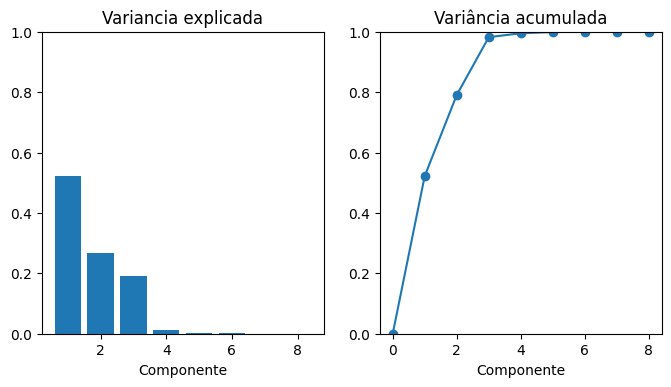

In [ ]:
#gráfico da variância explicada
def plot_variance(pca, width=8, dpi=100):
    # Criar figura
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Fazer o cálculo da variância explicada
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", 
        title="Variancia explicada", 
        ylim=(0.0, 1.0)
    )
    
    # Variância acumulada
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", 
        title="Variância acumulada", 
        ylim=(0.0, 1.0)
    )
    
    # Detalhes da figura
    fig.set(figwidth=8, dpi=100)
    return axs

# Graficar
plot_variance(pca)

Analisando a variância explicada, podemos notar que 3 componentes são razoáveis para nosso sistema.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #Definindo o normalizador
X_norm2 = scaler.fit_transform(df_atualizado[features].values) #Normalizando

In [ ]:
df_scaled = pd.DataFrame(X_norm2,columns = features) #Criando o DataFrame a partir com dados normalizados, que é um array de numpy
df_scaled = pd.concat([df_scaled,pd.Series(df_atualizado['diabetes_normalizado']).reset_index(drop=True)],axis=1) #Concatenando a coluna 'diabetes_normalizado' ao DataFrame
print(df_scaled.head(10)) #Exibindo as 10 primeiras linhas do dataset normalizado

        ano       idh  populacao_geral  per_crian_cinc_soprep  kcal_medio  \
0  1.000000  0.481928         1.000000               0.149254      1.0000   
1  0.947368  0.463855         0.991926               0.149254      1.0000   
2  0.894737  0.457831         0.983569               0.134328      0.9875   
3  0.842105  0.439759         0.975032               0.134328      0.9875   
4  0.789474  0.427711         0.966390               0.134328      0.9750   
5  0.736842  0.427711         0.957662               0.119403      0.9500   
6  0.684211  0.409639         0.948834               0.104478      0.9375   
7  0.631579  0.301205         0.939899               0.104478      0.9000   
8  0.578947  0.277108         0.930841               0.089552      0.8625   
9  0.526316  0.253012         0.921639               0.089552      0.8250   

   Argentina  Brasil  Chile  diabetes_normalizado  
0        0.0     1.0    0.0              0.000073  
1        0.0     1.0    0.0              0.00007

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

X = df_scaled[features] #Definindo o X como as features
y = df_scaled['diabetes_normalizado']  #Definindo o y como o target

pca = PCA(n_components=3) #Calculando o PCA para três componentes
pca.fit(X)                #Ajustando o PCA
X_pca = pca.transform(X)  #Realizando o PCA

In [ ]:
print(np.sum(pca.explained_variance_ratio_)) #Calculando a variância explicada acumulada para as três componentes principais

0.9888738336473011


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( #Chamando a função train_test_split, atribuindo os valores nas variáveis a esquerda da igualdade
    X_pca,                                           #Dados das componentes principais do PCA
    y,                                               #Dados do target
    test_size=0.2,                                   #Tamanho do conjunto de teste
    random_state=42)                                 #Semente aleatória

**Cálculo de correlação do dataset**

In [ ]:
df_pca_train = pd.DataFrame(X_pca,columns=['PC1', 'PC2', 'PC3']) #Define as colunas das PC em um dataframe, utilizando os dados do X_pca
df_pca_train['diabetes_normalizado'] = y                                        #Adiciona a coluna preço, com os dados de y
print(df_pca_train.head(10))                                     #Exibe as 10 primeiras linhas do dataset
corrmat = df_pca_train.corr()                                    #Cálculo da correlação
print(round(corrmat,4))                                          #Exibe a correlação com 4 casas decimais

        PC1       PC2       PC3  diabetes_normalizado
0  1.113889  0.011925 -0.668789              0.000073
1  1.116300  0.010221 -0.623021              0.000073
2  1.120119  0.008468 -0.574636              0.000072
3  1.122309  0.006820 -0.528816              0.000071
4  1.121650  0.003127 -0.478235              0.000070
5  1.122492 -0.000639 -0.425060              0.000069
6  1.129853 -0.002588 -0.372248              0.000067
7  1.157362 -0.012643 -0.272752              0.000065
8  1.164665 -0.019060 -0.203851              0.000063
9  1.165674 -0.027308 -0.134957              0.000061
                         PC1     PC2     PC3  diabetes_normalizado
PC1                   1.0000  0.0000 -0.0000                0.2007
PC2                   0.0000  1.0000  0.0000                0.5381
PC3                  -0.0000  0.0000  1.0000               -0.7504
diabetes_normalizado  0.2007  0.5381 -0.7504                1.0000


**Regressão linear do pca:**

In [ ]:
from sklearn.linear_model import LinearRegression

# cria o modelo
modelo_linear = LinearRegression()

# treina o modelo
modelo_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_test
y_previsao = modelo_linear.predict(X_test)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False) #Cálculo do RMSE

print(f"O RMSE do modelo linear foi de {RMSE} de diabéticos.")

O RMSE do modelo linear foi de 6.637586195293743e-06 de diabéticos.


In [ ]:
from sklearn.inspection import permutation_importance
N_REPETICOES = 10


def R2_1param(modelo, x, y):
    """Computa o coef. de determinação quando hip. alt. não tem coef. linear."""
    y_pred = modelo.predict(x).ravel()
    y_true = (np.array(y)).ravel()
    return 1 - sum((y_true - y_pred) ** 2) / sum(y_true**2)


X_local = X_train
y_local = y_train

R2 = R2_1param(modelo_linear, X_local, y_local)
print(f"O R^2 da previsão é de {R2}")

# Aqui que calculamos a importância das features
r = permutation_importance(
    modelo_linear,
    X_local,
    y_local,
    n_repeats = N_REPETICOES,
    random_state = Semente_Aleatoria,
    scoring=R2_1param,
)

print()

# Aqui nós exibimos os resultados obtidos
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{features[i]:<8}"
              f"{r.importances_mean[i]:.12f}"
              f" +/- {r.importances_std[i]:.12f}")

O R^2 da previsão é de 0.9824132048056541

populacao_geral0.198806118368 +/- 0.032220937495
idh     0.094483586341 +/- 0.016618212651
ano     0.016106435173 +/- 0.003226184014


In [ ]:
X_local = X_test
y_local = y_test

R2 = R2_1param(modelo_linear, X_local, y_local)
print(f"O R^2 da previsão é de {R2}")

# Aqui que calculamos a importância das features
r = permutation_importance(
    modelo_linear,
    X_local,
    y_local,
    n_repeats=N_REPETICOES,
    random_state=Semente_Aleatoria,
    scoring=R2_1param,
)

print()

# Aqui nós exibimos os resultados obtidos
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{features[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

O R^2 da previsão é de 0.9865912488452877

populacao_geral0.118 +/- 0.035
idh     0.062 +/- 0.024


**Floresta aleatória do pca:**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# cria o modelo
SEMENTE_ALEATORIA = 42875
modelo_rf = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42875)

In [ ]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_test
y_previsao = modelo_rf.predict(X_test)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE da floresta aleatória foi de {RMSE} de diabéticos.")

O RMSE da floresta aleatória foi de 1.7516490848098487e-06 de diabéticos.


In [ ]:
N_REPETICOES = 10


def R2_1param(modelo, x, y):
    """Computa o coef. de determinação quando hip. alt. não tem coef. linear."""
    y_pred = modelo.predict(x).ravel()
    y_true = (np.array(y)).ravel()
    return 1 - sum((y_true - y_pred) ** 2) / sum(y_true**2)


X_local = X_train
y_local = y_train

R2 = R2_1param(modelo_rf, X_local, y_local)
print(f"O R^2 da previsão é de {R2}")

# Aqui que calculamos a importância das features
r = permutation_importance(
    modelo_rf,
    X_local,
    y_local,
    n_repeats = N_REPETICOES,
    random_state = Semente_Aleatoria,
    scoring=R2_1param,
)

print()

# Aqui nós exibimos os resultados obtidos
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{features[i]:<8}"
              f"{r.importances_mean[i]:.12f}"
              f" +/- {r.importances_std[i]:.12f}")

O R^2 da previsão é de 0.9991856721446719

populacao_geral0.151231982296 +/- 0.032663994410
idh     0.095133658183 +/- 0.020318393311
ano     0.007383299292 +/- 0.001020921599


In [ ]:
X_local = X_test
y_local = y_test

R2 = R2_1param(modelo_rf, X_local, y_local)
print(f"O R^2 da previsão é de {R2}")

# Aqui que calculamos a importância das features
r = permutation_importance(
    modelo_rf,
    X_local,
    y_local,
    n_repeats=N_REPETICOES,
    random_state=Semente_Aleatoria,
    scoring=R2_1param,
)

print()

# Aqui nós exibimos os resultados obtidos
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{features[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

O R^2 da previsão é de 0.9990661820959915

populacao_geral0.101 +/- 0.031
idh     0.052 +/- 0.025
ano     0.003 +/- 0.001


**Árvore de decisão do PCA:**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# cria o modelo
Semente_Aleatoria = 623119
modelo_dt = DecisionTreeRegressor(random_state=Semente_Aleatoria)

# treina o modelo
modelo_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=623119)

In [ ]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_test
y_previsao = modelo_dt.predict(X_test)

RMSE_pca_dt = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE_pca_dt} porcentagem de diabéticos por milhar (normalizado).")

O RMSE do modelo árvore de decisão foi de 4.148558279303492e-06 porcentagem de diabéticos por milhar (normalizado).


In [ ]:
N_REPETICOES = 10


def R2_1param(modelo, x, y):
    """Computa o coef. de determinação quando hip. alt. não tem coef. linear."""
    y_pred = modelo.predict(x).ravel()
    y_true = (np.array(y)).ravel()
    return 1 - sum((y_true - y_pred) ** 2) / sum(y_true**2)


X_local = X_train
y_local = y_train

R2 = R2_1param(modelo_dt, X_local, y_local)
print(f"O R^2 da previsão é de {R2}")

# Aqui que calculamos a importância das features
r = permutation_importance(
    modelo_dt,
    X_local,
    y_local,
    n_repeats = N_REPETICOES,
    random_state = Semente_Aleatoria,
    scoring=R2_1param,
)

print()

# Aqui nós exibimos os resultados obtidos
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{features[i]:<8}"
              f"{r.importances_mean[i]:.12f}"
              f" +/- {r.importances_std[i]:.12f}")

O R^2 da previsão é de 0.9999999997749511

populacao_geral0.213358309583 +/- 0.047232512853
idh     0.184670202704 +/- 0.040672792277
ano     0.016381396645 +/- 0.005992349153


In [ ]:
X_local = X_test
y_local = y_test

R2 = R2_1param(modelo_dt, X_local, y_local)
print(f"O R^2 da previsão é de {R2}")

# Aqui que calculamos a importância das features
r = permutation_importance(
    modelo_dt,
    X_local,
    y_local,
    n_repeats=N_REPETICOES,
    random_state=Semente_Aleatoria,
    scoring=R2_1param,
)

print()

# Aqui nós exibimos os resultados obtidos
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{features[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

O R^2 da previsão é de 0.994762037627614

populacao_geral0.169 +/- 0.062


##### **Análise das performances**


Comparando os resultados obtidos nas regresões, podemos concluir que a performance do método não supervisionado melhorou em relação a performance do método supervisionado.

#### **Clustering**

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
n_clusters=3  #Define três clusters

kmeans = KMeans(            #Inicializando o K-Means
    n_clusters=n_clusters,  #Definindo número de clusters
    init='random',          #Inicialização randomica, aqui você pode tentar o K-Means++ :)
    n_init=10,              #Número de inicializações
    max_iter=300,           #Número máximo de iterações
    tol=1e-04,              #Tolerância para variação da coordenada dos centróides para definir a convergência
    random_state=0          #Define a semente aleatória
)

y_kmeans = kmeans.fit_predict(X_norm) #Fita o K-Means

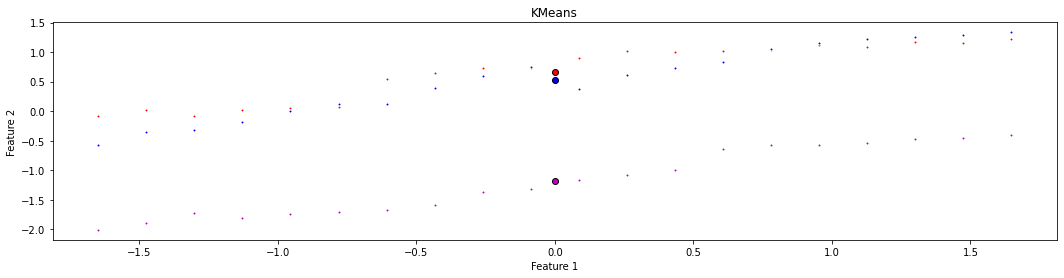

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

centroids = kmeans.cluster_centers_ #Extraindo os centróides do K-Means
labels = pairwise_distances_argmin(X_norm2, centroids) #Usando a função pairwise_distances_argmin 
                                                      #para dar os labels aos clusters
colors = ["r", "m", "b", "y", "k"] #Definindo a paleta de cores

fig = plt.figure(figsize=(18, 4)) #Definindo a figura e seu tamanho
ax = fig.add_subplot()             #Criando um subplot

for k, col in zip(range(n_clusters), colors): #Desempacotando a lista de número de cluster e cores.
    my_members = labels == k  #Define quais pontos são membros de cada cluster
    #print(my_members)        #Descomente essa linha para entender como se comporta a variável my_members
    cluster_center = centroids[k] #Pega as coordenadas do centróide k
    ax.plot(                      #Plota os pontos do centróide k
        X_norm[my_members, 0],    #Coordenada do eixo-x
        X_norm[my_members, 1],    #Coordenada do eixo-y
        markerfacecolor=col,      #Define a cor do ponto
        marker=".",               #Define o estilo do ponto
        markeredgecolor="w",      #Define a cor de contorno do ponto
        linewidth=0               #Largura de linha zero, para não ligar os pontos
    )
    ax.plot(                      #Plotando os centróides
        cluster_center[0],        #Coordenada x do centróide
        cluster_center[1],        #Coordenada y do centróide
        marker="o",               #Define estilo do ponto
        markerfacecolor=col,      #Define cor do ponto
        markeredgecolor="k",      #Define a cor do contorno do ponto
        markersize=6,             #Define o tamanho do ponto
        linewidth=0               #Largura de linha zero, para não ligar os pontos
    )

ax.set_title("KMeans")  #Título do gráfico
plt.xlabel('Feature 1') #Nome da componente x
plt.ylabel('Feature 2') #Nome da componente y

plt.show() #Mostrar o gráfico

In [ ]:
#transformação do PCA
pca = PCA()
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

In [ ]:
#K-means para com o PCA
n_clusters=3

kmeans = KMeans(
    n_clusters=n_clusters, 
    init='random',
    n_init=10, 
    max_iter=300, 
    tol=1e-04, 
    random_state=0
)

y_kmeans = kmeans.fit_predict(X_pca)

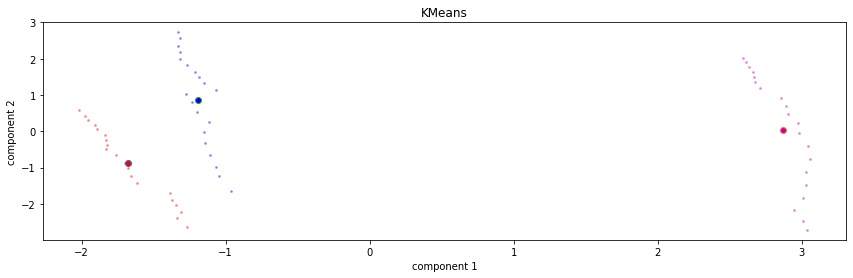

In [ ]:
#gráficos em função das duas componentes principais
centroids = kmeans.cluster_centers_
labels = pairwise_distances_argmin(X_pca, centroids)
colors = ["r", "m", "b", "y", "k"]

fig = plt.figure(figsize=(14.4, 4))
ax = fig.add_subplot()

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        X_pca[my_members, 0],
        X_pca[my_members, 1],
        "w", 
        markerfacecolor=col,
        marker=".",
        alpha = 0.5,
        linewidth=0)
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markersize=6,
        alpha = 1.0,
        linewidth=0
    )

ax.set_title("KMeans")
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.show()

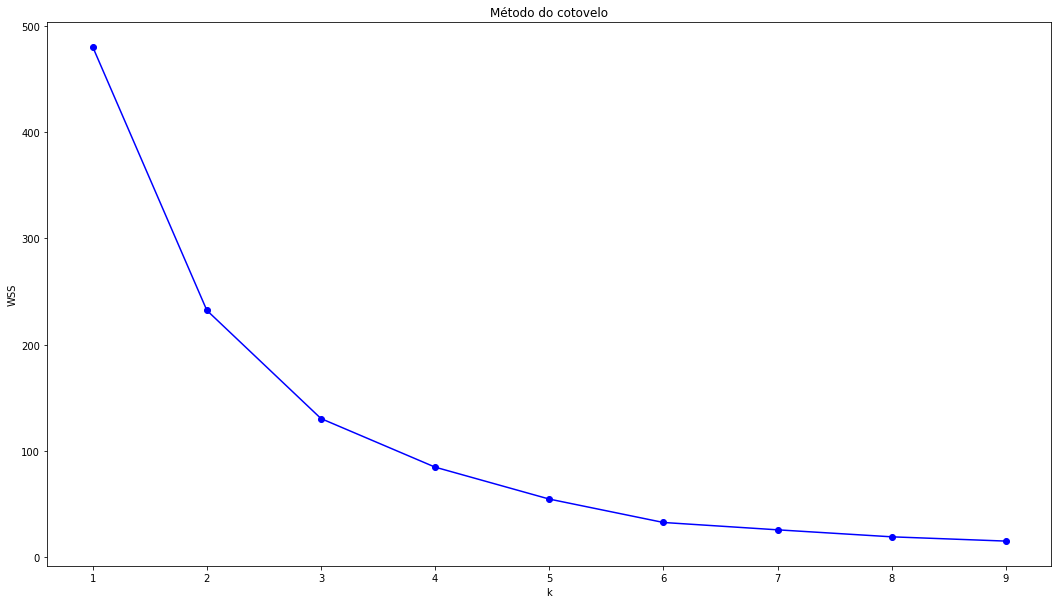

In [ ]:
#WSS em função do número de clusters
WSS = []  #Inicia uma lista vazia, para acumularmos valores.

for k in range(1,10): #Vamos fazer para 1 a 9 clusters.
    kmeans = KMeans(  #Inicializa o K-Means, como já explicado antes
        n_clusters=k, 
        init='random',
        n_init=10, 
        max_iter=300, 
        tol=1e-04, 
        random_state=0
    )
    y_kmeans = kmeans.fit_predict(X_pca) #Fita o K-Means
    WSS.append(kmeans.inertia_)          #Obtem a WSS e acumula na lista inicializada 
    
plt.figure(figsize=(18,10))              #Define o tamanho da figura
plt.plot(range(1,10), WSS, '-bo')        #Define o plot
plt.xlabel('k')                          #Nome da coordenada x
plt.ylabel('WSS')                        #Nome da coordenada y
plt.title('Método do cotovelo')          #Título do gráfico
plt.show()                               #Mostra o gráfico

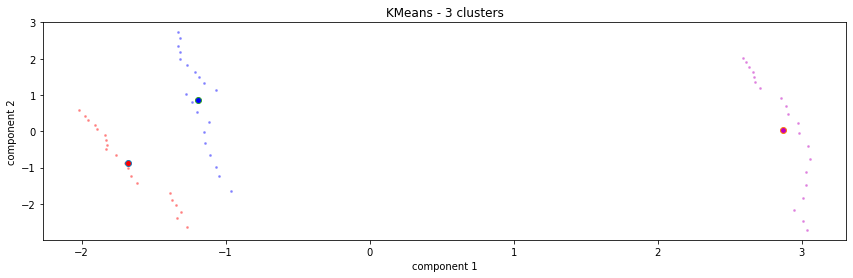

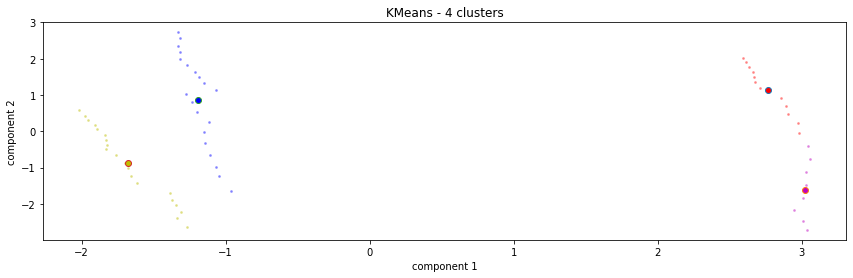

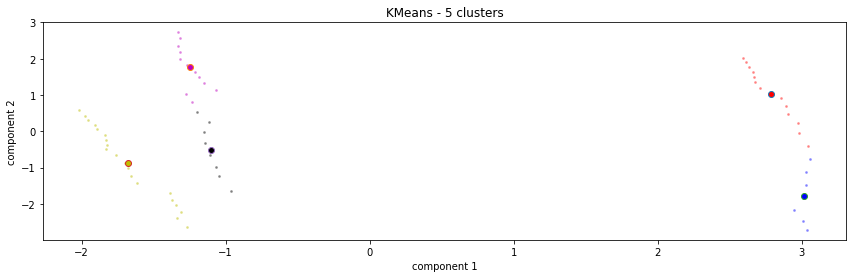

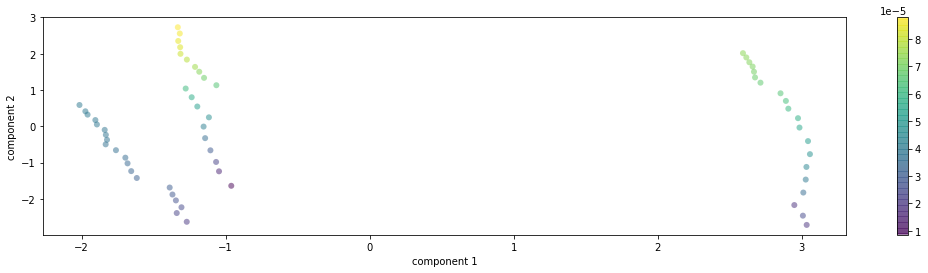

In [ ]:
#testando a quantidade de clusters
for numberofclusters in range(3,6):

    n_clusters=numberofclusters

    kmeans = KMeans(
        n_clusters=n_clusters, 
        init='random',
        n_init=10, 
        max_iter=300, 
        tol=1e-04, 
        random_state=0
    )

    y_kmeans = kmeans.fit_predict(X_pca)

    centroids = kmeans.cluster_centers_
    labels = pairwise_distances_argmin(X_pca, centroids)
    colors = ["r", "m", "b", "y", "k"]

    fig = plt.figure(figsize=(14.4, 4))
    ax = fig.add_subplot()

    for k, col in zip(range(n_clusters), colors):
        my_members = labels == k
        cluster_center = centroids[k]
        ax.plot(
            X_pca[my_members, 0],
            X_pca[my_members, 1],
            "w", 
            markerfacecolor=col,
            marker=".",
            alpha = 0.5,
            linewidth=0)
        ax.plot(
            cluster_center[0],
            cluster_center[1],
            "o",
            markerfacecolor=col,
            markersize=6,
            alpha = 1.0,
            linewidth=0
        )
    title = 'KMeans - ' + str(numberofclusters) + " clusters"
    ax.set_title(title)
    plt.xlabel('component 1')
    plt.ylabel('component 2')

    plt.show()


fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()

plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5, c=df_atualizado["diabetes_normalizado"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

O agrupamento que mais se adequa é o de 3 cluster, porém a divisão de 5 clusters apresenta um agrupamento bom também.

<class 'list'>
<class 'float'>
<class 'list'>
<class 'float'>
<class 'list'>
<class 'float'>


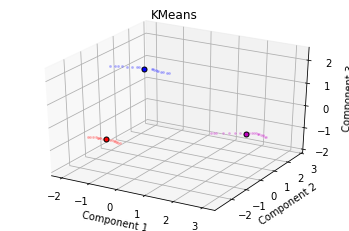

In [ ]:
#gráfico 3d
from mpl_toolkits import mplot3d

n_clusters=3

kmeans = KMeans(
    n_clusters=n_clusters, 
    init='random',
    n_init=10, 
    max_iter=300, 
    tol=1e-04, 
    random_state=0
)

y_kmeans = kmeans.fit_predict(X_pca)

centroids = kmeans.cluster_centers_
labels = pairwise_distances_argmin(X_pca, centroids)
colors = ["r", "m", "b", "y", "k"]

fig = plt.figure() #figsize=(22, 10))
ax = fig.add_subplot(projection='3d')

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        X_pca[my_members, 0], 
        X_pca[my_members, 1],
        X_pca[my_members, 2],
        "w", 
        markerfacecolor=col, 
        marker=".",
        linewidth=0,
        alpha=0.3
    )
    c0 = np.ndarray.tolist(cluster_center[0:3])
    print(type(c0))
    print(type(c0[0]))
    c1 = []
    c1.append(c0[0])
    c2 = []
    c2.append(c0[1])
    c3 = []
    c3.append(c0[2])
    ax.plot(
        c1,
        c2,
        c3,
        "o",
        markerfacecolor=col,
        marker=".",
        markeredgecolor="k",
        markersize=10,
    )

ax.set_title("KMeans")
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()

In [ ]:
print (cluster_center)

[-1.18996524e+00  8.51321697e-01  1.42234472e+00  1.08741111e-02
  3.77701537e-03  4.75947222e-04  1.98393302e-04  4.24824133e-17]


**Ward**

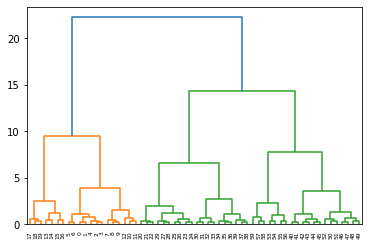

In [ ]:
#Usando o dendrograma para encontrar o número ideal de clusters
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
model = AgglomerativeClustering(n_clusters= 4, affinity='euclidean', linkage='ward') #Ajustando o cluster hierárquico ao conjunto de dados 
y_hc=model.fit_predict(X_pca)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))

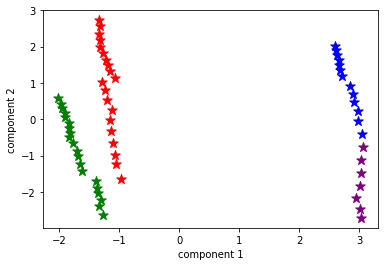

In [ ]:
#Visualizando método de cluster ward
plt.scatter(X_pca[labels==0, 0], X_pca[labels==0, 1], s=100, marker='*', color='red')
plt.scatter(X_pca[labels==1, 0], X_pca[labels==1, 1], s=100, marker='*', color='blue')
plt.scatter(X_pca[labels==2, 0], X_pca[labels==2, 1], s=100, marker='*', color='green')
plt.scatter(X_pca[labels==3, 0], X_pca[labels==3, 1], s=100, marker='*', color='purple')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

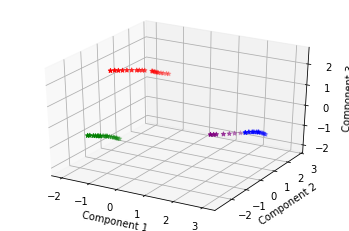

In [ ]:
#gráfico 3d
fig = plt.figure()
ax = plt.axes(projection='3d')
model = AgglomerativeClustering(n_clusters= 4, affinity='euclidean', linkage='ward')
y_hc=model.fit_predict(X_pca)
labels = model.labels_
ax.scatter3D(X_pca[labels==0, 0], X_pca[labels==0, 1],X_pca[labels==0, 2], marker='*', color='red')
ax.scatter3D(X_pca[labels==1, 0], X_pca[labels==1, 1],X_pca[labels==1, 2], marker='*', color='blue')
ax.scatter3D(X_pca[labels==2, 0], X_pca[labels==2, 1],X_pca[labels==2, 2], marker='*', color='green')
ax.scatter3D(X_pca[labels==3, 0], X_pca[labels==3, 1],X_pca[labels==3, 2], marker='*', color='purple')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

**Birch**

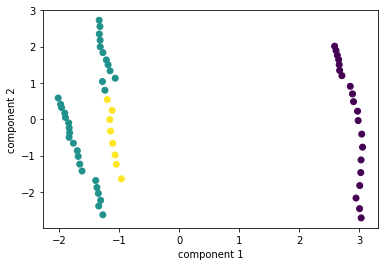

In [ ]:
#Aplicando o método BIRCH
from sklearn.cluster import Birch
model = Birch(branching_factor = 30, n_clusters = None, threshold = 2)
model.fit(X_pca)
pred = model.predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = pred)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

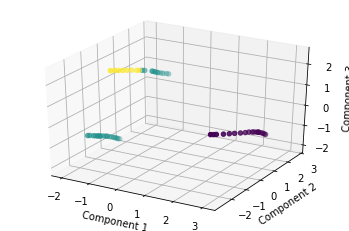

In [ ]:
#gráfico 3d
fig = plt.figure()
ax = plt.axes(projection='3d')
model = Birch(branching_factor = 200, n_clusters = None, threshold = 2)
model.fit(X_pca)
pred = model.predict(X_pca)
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c = pred)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

O método que mais se encaixou foi o Birch, já que apresentou uma divisão mais clara dos dados em 3 grupos diferentes.

### **Análise de Outliers:**


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

**Isolation Forest**

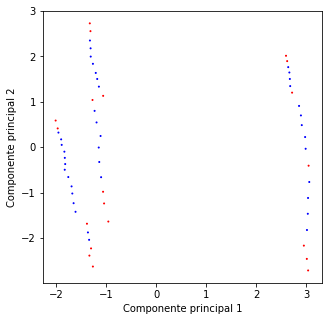

In [ ]:
# precisamos indicar a fração de outliers, vamos estimar que seja 1%
from sklearn.ensemble import IsolationForest
FRACAO_OUTLIERS = "auto"

CORES = np.array(["red", "blue"])

modelo_if = IsolationForest(
    contamination=FRACAO_OUTLIERS,
    random_state=SEMENTE_ALEATORIA,
)

# Ajustamos o modelo aos dados e realizamos a previsão
modelo_if.fit(X_pca)
previsao = modelo_if.predict(X_pca)

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=1,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xlabel("Componente principal 1")
eixo.set_ylabel("Componente principal 2")
plt.show()

**LOF**

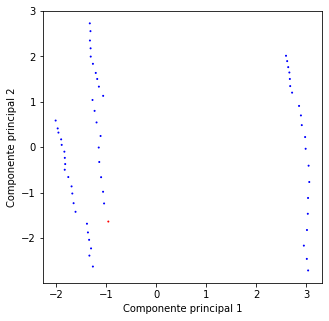

In [ ]:
# precisamos indicar a fração de outliers, vamos estimar que seja definida automáticamente
FRACAO_OUTLIERS = "auto"

# precisamos também indicar o número de vizinhos que serão considerados
N_VIZINHOS1 = 10

CORES = np.array(["red", "blue"])

modelo_lof = LocalOutlierFactor(
    n_neighbors=N_VIZINHOS1,
    contamination=FRACAO_OUTLIERS,
)

modelo_lof.fit(X_pca)
previsao = modelo_lof.fit_predict(X_pca)

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=1,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xlabel("Componente principal 1")
eixo.set_ylabel("Componente principal 2")
plt.show()

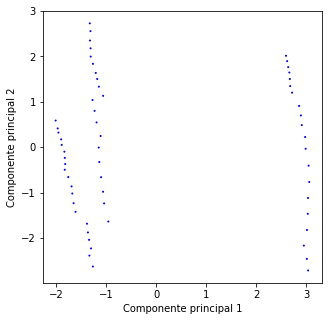

In [ ]:
# precisamos indicar a fração de outliers, vamos estimar que seja 1%
FRACAO_OUTLIERS = "auto"

# precisamos também indicar o número de vizinhos que serão considerados
N_VIZINHOS2 = 20

CORES = np.array(["red", "blue"])

modelo_lof = LocalOutlierFactor(
    n_neighbors=N_VIZINHOS2,
    contamination=FRACAO_OUTLIERS,
)

modelo_lof.fit(X_pca)
previsao = modelo_lof.fit_predict(X_pca)

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=1,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xlabel("Componente principal 1")
eixo.set_ylabel("Componente principal 2")
plt.show()

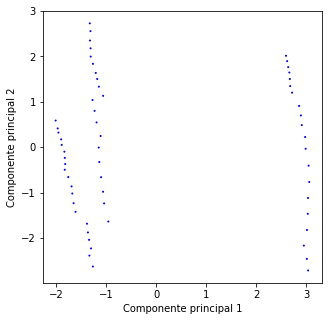

In [ ]:
# precisamos indicar a fração de outliers, vamos estimar que seja 1%
FRACAO_OUTLIERS = "auto"

# precisamos também indicar o número de vizinhos que serão considerados
N_VIZINHOS3 = 30

CORES = np.array(["red", "blue"])

modelo_lof = LocalOutlierFactor(
    n_neighbors=N_VIZINHOS3,
    contamination=FRACAO_OUTLIERS,
)

modelo_lof.fit(X_pca)
previsao = modelo_lof.fit_predict(X_pca)

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=1,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xlabel("Componente principal 1")
eixo.set_ylabel("Componente principal 2")
plt.show()

**Análise e comparação dos métodos de outliers:**

Pelo método da isolation forest com a porcentagem de outliers automática, o resultado obtido em nosso ver, em primera análise, não corresponde a realidade pois selecionou pontos que parecem coerente aos dados.

Posteriormente ao fazer a análise dos resultados do local outlier factor com a porcentagem de outliers também no automático obtivemos o resultado de nenhum outlier identificado independente do número de vizinhos que adicionamos.

A partir desses resultados chegamos a conclusão de que, analisando em duas dimensões, os nossos dados apresentam bom comportamento.